## ロジスティック回帰

学校の試験のスコアから、入学を許可するか否かを判定するロジスティック回帰

データセット：試験A, Bのスコア、入学許可

Source: http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-3/

流れ:
1. データをファイルから取得
2. シグモイド関数、コスト関数、Gradient Descentを定義
3. トレーニングを実施
4. 結果を評価、プロットする

In [1]:
# ライブラリ読み込み
import os
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# データ読み込み
path = '../data/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# pos(Admitted)とneg(Not Admitted)のデータを取得
pos = data[data['Admitted'].isin([1])]
neg = data[data['Admitted'].isin([0])]
pos.shape, neg.shape

((60, 3), (40, 3))

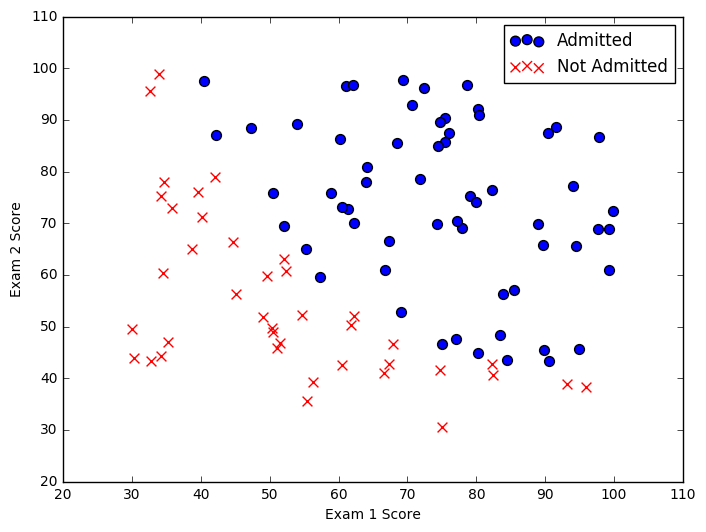

In [4]:
# データをプロットする
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(pos['Exam 1'], pos['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(neg['Exam 1'], neg['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [5]:
# シグモイド関数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

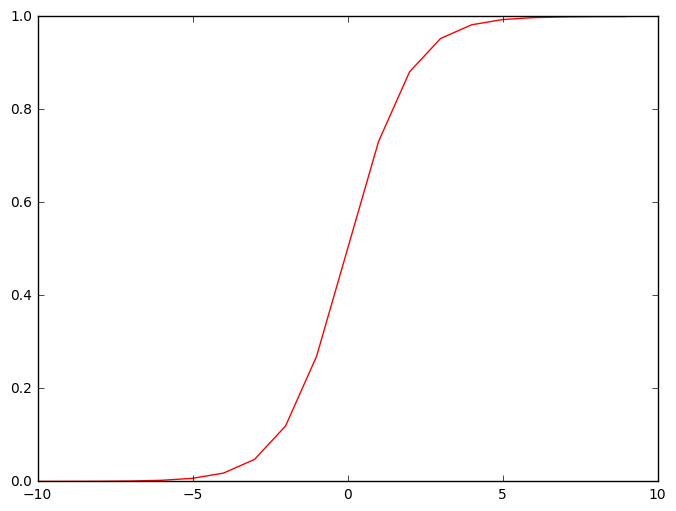

In [6]:
# シグモイド関数のプロット
nums = np.arange(-10, 10, step=1)
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.plot(nums, sigmoid(nums), 'r')

In [7]:
# コストファンクション
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(X)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / m

In [8]:
# x0 = 1の列を追加（行列の掛け算を行えるようにする）
data.insert(0, 'Ones', 1)
data.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [9]:
# Xとyを設定
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]
cols, X.shape, y.shape

(4, (100, 3), (100, 1))

In [10]:
# numpy arrayに変換
X = np.array(X.values)
y = np.array(y.values)

In [11]:
# thetaを0で初期化
theta = np.zeros(cols-1)
theta

array([ 0.,  0.,  0.])

In [12]:
# 現在のthetaの値で、コストファンクションを計算
cost(theta, X, y)

0.69314718055994529

In [13]:
# GradientDescentを1度実施するメソッド
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(X)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    # 誤差を計算
    error = sigmoid(X * theta.T) - y
    # 各パラメータで更新
    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        grad[i] = np.sum(term) / m
    return grad

In [14]:
# GradientDescentを実施
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result[0]

array([-25.16131861,   0.20623159,   0.20147149])

In [15]:
# トレーニング後の実行後のコストを計算
cost(result[0], X, y)

0.20349770158947472

In [16]:
# 予想関数
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [17]:
# 精度の算出
def accuracy(predictions, y):
    correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
    return (sum(map(int, correct)) % len(correct))

In [18]:
# 精度を表示
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
acc = accuracy(predictions, y)
print('accuracy: {0}%'.format(acc))

accuracy: 89%


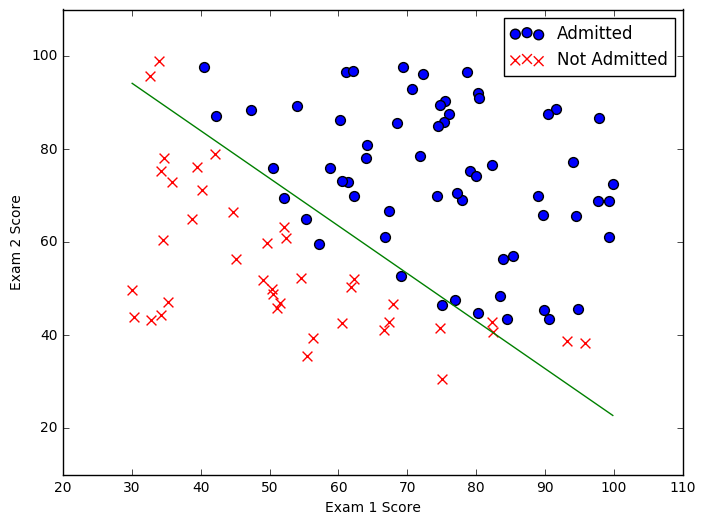

In [23]:
# Descision bounddaryを引く
# g(θ0 + θ1*x1 + θ2 * x2)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(pos['Exam 1'], pos['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(neg['Exam 1'], neg['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
x1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x2 = (-theta_min[0, 0] - theta_min[0, 1] * x1 ) / theta_min[0, 2]
ax.plot(x1, x2, c='g')